# Assignment 3


Importing necessary headers and dataset.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')
dataset = pd.read_csv('weekly.csv')

## (a) Summary of data.

Generating graphical summary of dataset.

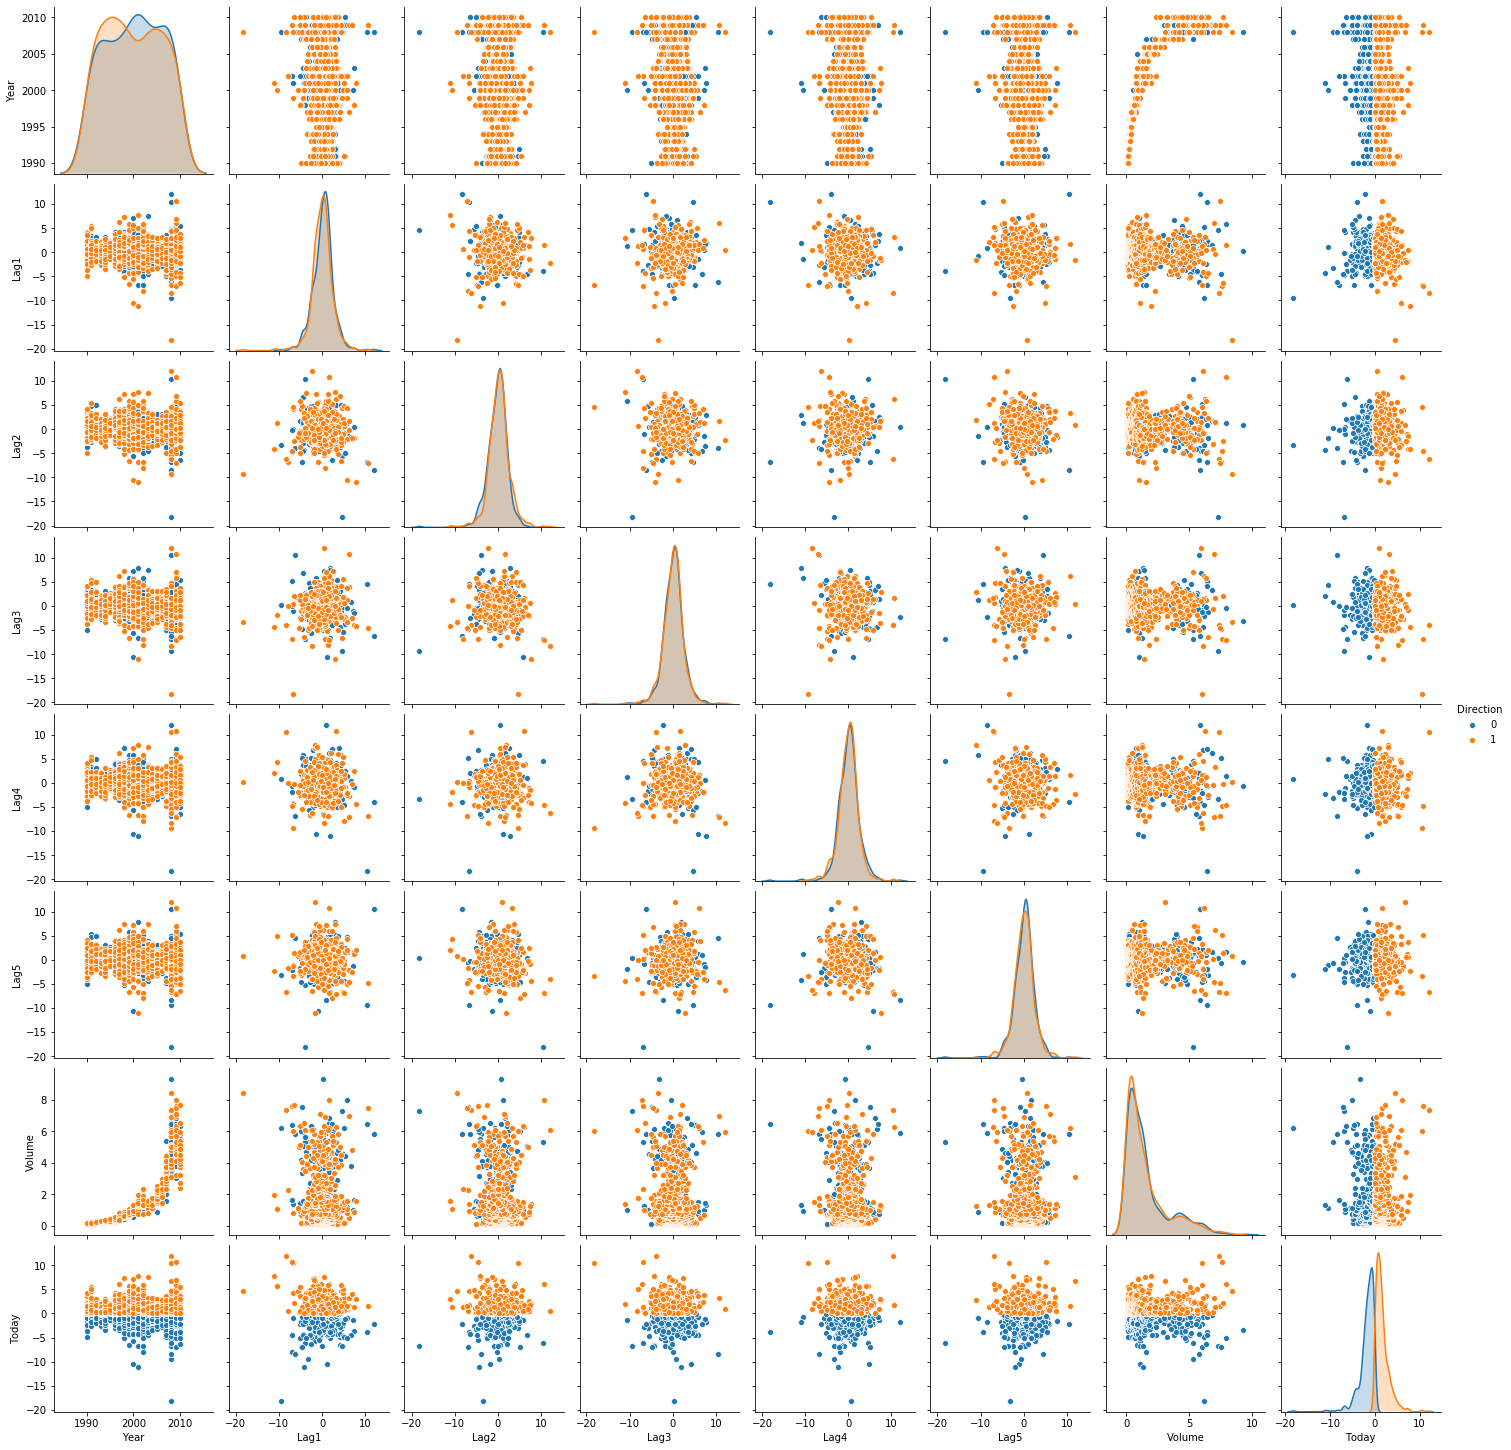

In [15]:
sns.pairplot(dataset,hue='Direction')

Getting numbers of shares traded (x-axis) in different weeks (y-axis).

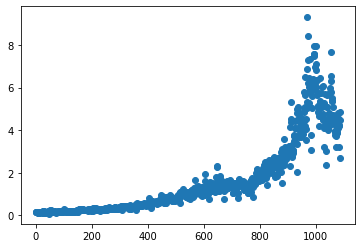

In [17]:
ax=plt.axes()
ax.scatter(x=dataset.index,y=dataset['Volume'])
plt.show()

## (b) Logistic Regression.

Fitting the data.

In [20]:
X = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:, -1].values

model = LogisticRegression(random_state=42)

model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Weightage on different features.

In [9]:
for i in range(6):
    print("%s : %.2f"%(list(dataset)[i+1] ,model.coef_[0][i]))

Lag1 : -0.04
Lag2 : 0.06
Lag3 : -0.02
Lag4 : -0.03
Lag5 : -0.01
Volume : -0.02


### Conclusion :
Correlation to Lag2 is highest.

In [10]:
print("Confusion matrix :" )
print(confusion_matrix(y, model.predict(X) ))
print("Accuracy  : %.2f "%model.score(X, y))

Confusion matrix :
[[ 54 430]
 [ 48 557]]
Accuracy  : 0.56 


## (c) Fitting data till 2008 based on single column

In [11]:
X = dataset.iloc[:, 2:3].values
model.fit(X[:985], y[:985])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
print("Accuracy on test data 2009 - 10 : %.2f "%model.score(X[985:], y[985:]))


Accuracy on test data 2009 - 10 : 0.62 
